# Text Mining Final Project 2019 - 2020

## Identifying Authors by Their Writings 

## Authors: 
- Lara Neves (m20190867) 
- Susana Paço (m20190821)
- Inês Diogo (m20190301)


In [14]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from collections import defaultdict
from pathlib import Path

import os
from os import path
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [15]:
import sys 
#!{sys.executable} -m pip install git+https://github.com/textpipe/textpipe.git


* [1. Data Pre-Processing](#DPP)
    
    * [1.1. Renaming txt Files](#rename)

    * [1.2. Extracting Data](#extract)
    
    * [1.3. Clearing MetaData](#ClearMD)
    
* [2. Creating a Baseline](#Baseline)

<a class="anchor" id="DPP">

## 1. Data Preprocessing



<a class="anchor" id="rename">

### 1.1. Renaming .txt Files


In [16]:
#Changing the names of the .txt files so there's no duplicates

def change_file_name(author):
    i = 0
    my_dir_path = "Data/Corpora/train/" + author
    
    for filename in os.listdir(my_dir_path): 
        
        #Define the new and old names with directory path
        new_name =str(author) + str(i) + ".txt"
        old_name = my_dir_path + '/' + filename 
        new_name = my_dir_path + '/' + new_name 
        
        #So it doesn't give out an error when it runs for the second time
        # rename all the files 
        if new_name != old_name: #IT STILL GIVES OUT ERROR
            os.rename(old_name, new_name) 
        i += 1

In [17]:
authors = ['AlmadaNegreiros','CamiloCasteloBranco','EcaDeQueiros','JoseRodriguesSantos','JoseSaramago','LuisaMarquesSilva']
authors_sigla = ['AN','CCB','EQ','JRS','JS','LMS']

#### ONLY RUN ONCE IF THE FILE NAMES ARE THE ORIGINAL otherwise, running a second time, will give an error

In [18]:
#for a in range(len(authors)):
#    change_file_name(authors[a])

<a class="anchor" id="extract">

### 1.2. Extracting Data

In [19]:
#Create a df for one author the respective .txt files in the corpora
def create_df_from_txt(author):
    my_dir_path = "Data/Corpora/train/" + author

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"].append(file.name)
            results["text"].append(file_open.read())
            results["author"] = author
            file_open.close()
    df = pd.DataFrame(results)
    
    return df

In [20]:
#Join together the dataframes from all the authors
def join_df(authors):

    df = pd.DataFrame()
    for a in range(len(authors)):
        df = df.append(create_df_from_txt(authors[a]))
    df.reset_index(inplace = True, drop = True)    
    return df 

In [21]:
### Running all the functions

#Creating the training data frame
traindf = join_df(authors)

#Replacing the name of the authors with labels of their initials
for i in range(0,len(authors)):
    traindf.author = traindf.author.replace(authors[i],authors_sigla[i])
traindf

,id,text,author
0,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN
1,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN
2,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN
3,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN
4,AlmadaNegreiros5.txt,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,AN
...,...,...,...
58,LuisaMarquesSilva3.txt,CONTROL Z\nChegou a hora de vos contar. Chegou...,LMS
59,LuisaMarquesSilva2.txt,O terrível caso do botão assassino\nLuísa Marq...,LMS
60,LuisaMarquesSilva0.txt,A BELA HISTÓRIA DE DINIS E BEATRIZ OU REQUIEM ...,LMS
61,LuisaMarquesSilva1.txt,\n\n\nAcabou-se!\nLuísa Marques da Silva\n\nTí...,LMS


<a class="anchor" id="clearMD">

### 1.2. Clearing MetaData
</a>

The majority of the .txt files have metadata at the beginning. This is unnecessary and may introduce noise in our model, as such it may be a good idea to remove it. 

In [22]:
import spacy

Testing with just one of the .txt:

In [23]:
test = traindf.iloc[0:1]
test

,id,text,author
0,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN


In [24]:
def set_custom_boundaries(doc):
    # Adds support to use '\n\n\n' as the delimiter for sentence detection
    for token in doc[:-1]:
        if token.text == '\n\n\n':
            doc[token.i+1].is_sent_start = True
    return doc


nlp = spacy.load('en_core_web_sm',disable=["parser"])
nlp.add_pipe(set_custom_boundaries)
custom_sentences = nlp(test.iloc[0,1])
custom_sentences = list(custom_sentences.sents)

i=0
for sentence in custom_sentences:
    print('**SPACE', i, '**', sentence)
    i +=1
#nlp_pt = spacy.load('pt_core_news_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [25]:
text_nometa = custom_sentences[1]

NameError: name 'custom_sentences' is not defined

In [26]:
#WIP.... 
#Works for a few of the .txt files if the meta data is just at the beginning but not if there are too many large spaces (/n/n/n) or if there are spaces between the text

# removing crucial metadata


In [27]:
python -m spacy download pt_core_news_sm

SyntaxError: invalid syntax (<ipython-input-27-12e2916e073b>, line 1)

In [28]:
import sys
!{sys.executable} -m pip install -U spacy
!{sys.executable} -m  spacy download pt_core_news_sm

Requirement already up-to-date: spacy in /opt/anaconda3/lib/python3.7/site-packages (2.2.4)
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [29]:
import pt_core_news_sm
nlp = pt_core_news_sm.load()

In [30]:
#author names

nlp.Defaults.stop_words |= {"José de Almada Negreiros","Almada Negreiros", "Camilo Castelo Branco", "Eça de Queirós", "Eca de Queiros", "José Rodrigues dos Santos","Jose Rodrigues dos Santos", "José Saramago", "Jose Saramago", "Luísa Marques Silva", "Luisa Marques Silva" }

In [41]:
#author Almada Negreiros

nlp.Defaults.stop_words |= {'O Moinho', 'Os Outros', '23, 2º Andar', 'Frizos, published in Orpheu vol. 1, pp. 51–59 (prose)', 'A Cena do Ódio', 'Manifesto Anti-Dantas e por extenso', 'Litoral', 'A Engomadeira', 'Ultimatum Futurista, às gerações portuguezas do século XX ', 'K4, O Quadrado Azul', 'Saltimbancos Contrastes Simultâneos', 'A Invenção do Corpo ', 'O Cágado', 'A Invenção do Dia Claro ','Histoire du Portugal par coeur', 'Pierrot e Arlequim', 'Nome de Guerra', 'A Questão dos Painéis ', 'El uno, tragedia de la unidad (composed of Deseja-se Mulher and S.O.S)',   'El uno, tragedia de la unidad ','Portugal, Direcção Única', 'Elogio da Ingenuidade ou as Desventuras da Esperteza Saloia' , 'Mito-Alegoría-Símbolo, Monólogo autodidacta na oficina da pintura ' }

In [46]:
test.at[0,'text']

"\nTitle: Litoral\n       A Amadeo de Souza Cardozo\n\nAuthor: José de Almada Negreiros\n\nContributor: Amadeu de Sousa Cardoso\n\nRelease Date: September 29, 2007 [EBook #22802]\n\nLanguage: Portuguese\n\n\n\n\n\n\nespasmos de praiamar transbordam invasão\na areia mergulha pró fundo do Mar plos olhos do\n                                         pirata\n                             desvirgados á prôa\nMaresia    cio do Mar\n           qué da vela Latina?\n           Sinhora da Livramento\n           Leilão de salvados\nGuarda Fiscal                    a Costa\n           Forte da Barra\no retrato do Piloto a cêbo d'Hollanda e limão dôce\nsabots d'Alfandega    e    cachimbo motor\n           Taverna Maritima\n           Kean    marujo Inglez\nNivel +12+        cuidado co'os helices\n            +BELFAST+\na Grande Cheia     atavismos do Diluvio\n\n\n\n\no mêdo das rochas encolhidas ao luar onanista\nredemoinhos do perigo perpendicular\n                   o brilho do óleo Negro\no dever 

In [52]:
from nltk.tokenize import word_tokenize
import spacy

all_stopwords = spacy.stop_words

text_tokens = word_tokenize(test.at[0,'text'])
tokens_without_sw= [word for word in text_tokens if not word in all_stopwords]

print(tokens_without_sw)

AttributeError: module 'spacy' has no attribute 'stop_words'

<a class="anchor" id="clearTexts">

### 1.4. Cleaning Texts
</a>


In [21]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm_notebook as tqdm #progressbar
from unidecode import unidecode

In [22]:
def preprocessing(doc):
    processed_corpus = []
    stop_words = set(stopwords.words("portuguese"))
    for i in tqdm(range(len(doc))):
        text = doc['text'].iloc[i,]
        
        #Remove accents
        text = unidecode(text)

        #Lowercasing
        text = text.lower()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        #Removing stop words, but leaving the punctuation 
        lem = WordNetLemmatizer()
        textfinal = []
        for word in text:
            if re.sub('[^A-Za-z0-9]',' ', word) in stop_words:
                if re.sub('[A-Za-z0-9]','', word) != '':
                    textfinal.append(re.sub('[A-Za-z0-9]','', word))
            if not re.sub('[^A-Za-z0-9]','', word) in stop_words:
                textfinal.append(lem.lemmatize(word))
        
        textfinal = " ".join(textfinal)
        processed_corpus.append(textfinal)
         
    return processed_corpus

In [23]:
traindf['clean_with_punc'] = preprocessing(traindf)

In [24]:
def nopunctuation(doc):
    processed_corpus = []
    stop_words = set(stopwords.words("portuguese"))
    for i in tqdm(range(len(doc))):
        text = doc['clean_with_punc'].iloc[i,]
        
        #Remove punctuation
        text = re.sub('[^A-Za-z0-9]',' ', text) 
        
        #Remove the 'new' stop-words
        # Convert to list from string
        text = text.split()
        text = [word for word in text if not word in stop_words] 
        
        text = " ".join(text)
        processed_corpus.append(text)
        
 
    return processed_corpus

In [25]:
traindf['clean'] = nopunctuation(traindf)
traindf

,id,text,author,clean_with_punc,clean
0,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN,title: scena odio author: jose almada negreiro...,title scena odio author jose almada negreiro...
1,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN,title: jardim pierrette author: jose almada ne...,title jardim pierrette author jose almada ne...
2,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN,title: invencao dia claro author: jose almada ...,title invencao dia claro author jose almada ...
3,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN,title: litoral amadeo souza cardozo author: jo...,title litoral amadeo souza cardozo author jo...
4,AlmadaNegreiros4.txt,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,AN,exposicao +amadeo souza cardoso+ liga naval li...,exposicao amadeo souza cardoso liga naval li...
...,...,...,...,...,...
58,LuisaMarquesSilva4.txt,Título\ne-medo\n\nAutora (inspiradíssima)\nLuí...,LMS,titulo e-medo autora (inspiradissima) luisa ma...,titulo e medo autora inspiradissima luisa ma...
59,LuisaMarquesSilva5.txt,"LISBOA 2050\nLisboa, ano de 2050. Um Agosto tã...",LMS,"lisboa 2050 lisboa, ano 2050. agosto tao gelad...",lisboa 2050 lisboa ano 2050 agosto tao gelad...
60,LuisaMarquesSilva6.txt,Título\nUm passeio pelo inferno\n\nAutora\nLuí...,LMS,titulo passeio inferno autora luisa marque sil...,titulo passeio inferno autora luisa marque sil...
61,LuisaMarquesSilva7.txt,Título\nRapsódia sem dó (maior)\n\nAutora\nLuí...,LMS,titulo rapsodia (maior) autora luisa marque si...,titulo rapsodia maior autora luisa marque si...


<a class="anchor" id="Baseline">

## 2. Creating a Baseline
    
</a>

Our goal now is to create a naíve baseline to compare our model with. It won't involve any pre-processing of data or removal of extra meta data.

1st Try: Using DummyClassifier as a baseline? 

In [26]:
import numpy as np
from sklearn.dummy import DummyClassifier

In [54]:
def dummy_classifier_score(df,text_column,strategy):

    X = df.loc[:,text_column]
    y = df.loc[:,'author']
    dummy_clf = DummyClassifier(strategy=strategy) #stratified, most_frequent
    dummy_clf.fit(X, y)
    dummy_clf.predict(X)
    return dummy_clf.score(X, y)

In [56]:
dummy_classifier_score(traindf,'text','most_frequent')

0.31746031746031744

Too stupid of a baseline? Creating a bag-of-words is probably a better choice: 

## Choosing Evaluation Metrics

Can we use Accuracy as an evaluation metric? Depends if the dataset is unbalanced. Let's check:

In [29]:
traindf.iloc[:,2].value_counts()

CCB    20
JS     12
LMS     9
AN      9
JRS     8
EQ      5
Name: author, dtype: int64

It is unbalanced in favour of Camilo Castelo Branco which is why we get a higher accuracy when we use the DummyClassifier with most frequent strategy (0.31) compared to other strategies (stratified 0.22) even though it's just classifying all texts as belonging to CCB. As such accuracy may not be the best metric in this case.

## Word Cloud

To see a word cloud - or the most frequent words - written by a given author just type in the function one of the following siglas: 


In [30]:
authors_sigla

['AN', 'CCB', 'EQ', 'JRS', 'JS', 'LMS']

Corresponding to the following authors:

In [31]:
authors

['AlmadaNegreiros',
 'CamiloCasteloBranco',
 'EcaDeQueiros',
 'JoseRodriguesSantos',
 'JoseSaramago',
 'LuisaMarquesSilva']

In [37]:
def word_cloud(author,text_column):
    word_cloud = " ".join(traindf[traindf['author']==author][text_column])


    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word_cloud)
    # Display the generated image:
    plt.figure(figsize=(17,7))
    plt.title('Word Cloud from ' + author)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

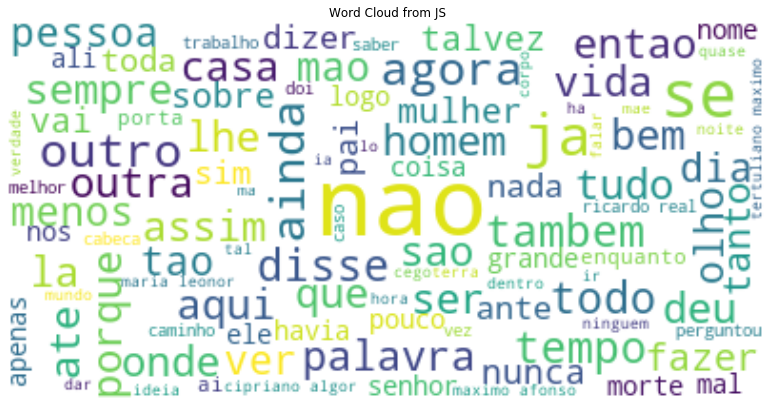

In [38]:
word_cloud('JS','clean')

WILL NEED TO REMOVE STOP WORDS FIRST BEFORE IT MAKES ANY SENSE 

## Testing the Importance of Punctuation

We know that José Saramago has an interesting use of punctuation and it can be a factor in identifying texts from him. Does this mean that we shouldn't consider punctuations as stop-words? Let's test it.

To do so we will use a dummy classifier on two texts from Saramago and two from JRS. Will we see a difference in the performance of the classifier with or without punctuation?

In [33]:
punc_traindf = traindf[traindf.author=='JS'][1:3].append(traindf[traindf.author=='JRS'][1:3])

We will run the dummy classifier n_iter times and determine the difference between the two. If the classifier is better with punctuation we should see a _positive difference_ meaning that the classifier that runs on the text with punctuation should have a better accuracy score than the one without. 

In [34]:
n_iter = 50000
score_punc_test = []
for i in range(0,n_iter):
    score_punc_test.append(dummy_classifier_score(punc_traindf,'clean_with_punc','stratified')-dummy_classifier_score(punc_traindf,'clean','stratified'))
    i += 1
score_punc_test = pd.DataFrame(score_punc_test)

In [35]:
score_punc_test.describe()

,0
count,50000.000000
mean,-0.002245
std,0.353346
min,-1.000000
25%,-0.250000
50%,0.000000
75%,0.250000
max,1.000000


There's a very very small change between each classifiers. Which may indicate that there are no difference in the performance of the classifier of JS with or without punctuation. 

To confirm this, let's do a one sided hypothesis test, where the null hypothesis is that the mean of the difference between the scores is zero, meaning there is no difference between doing a classifier with or without punctuation for José Saramago.

In [36]:
from scipy.stats import ttest_1samp

diff_mean = np.mean(score_punc_test)
print('mean', diff_mean)
tset, pval = ttest_1samp(score_punc_test, 0)
print('p-values', pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("Reject the null hypothesis: there are evidence that the classifier performs differently if there's punctuation")
else:
  print("Do not reject the null hypothesis: there are no evidence that the classifier is better if we mantain the punctuation")

mean 0   -0.002245
dtype: float64
p-values [0.1554119]
Do not reject the null hypothesis: there are no evidence that the classifier is better if we mantain the punctuation


## Cross-validation 
We already have a test set defined however there is value in having an evaluation/development set to determine the model performance as it's being trained and to adjust the parameters.

Given the relatively small amount of data we chose to use cross-validation rather than splitting the set into training and evaluation sets.

We will do so by applying the k-fold crossvalidation method, the choice of number of folds k will be decided according to:

"... there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance." - Page 184, An Introduction to Statistical Learning, 2013.

In [63]:
from sklearn.model_selection import KFold
#Creating a k-fold instance where the number of splits is 10
kf = KFold(n_splits=10)

In [64]:
#Using accuracy may have to change
def evaluate_model(X,y, model):
    return model.score(X,y)

In [65]:
#Placeholder dummy classifier
def dummy_classifier_model(X,y,strategy):
    dummy_clf = DummyClassifier(strategy=strategy) #stratified, most_frequent
    model = dummy_clf.fit(X, y)
    return model

In [70]:
#For the dummy classifier
def avg_score_DC(method,X,y,strategy):
    score_train = []
    score_eval = []
    for train_index, eval_index in method.split(X):
        X_train, X_eval = X.iloc[train_index], X.iloc[eval_index]
        y_train, y_eval = y.iloc[train_index], y.iloc[eval_index]
        ####Define model:
        model = dummy_classifier_model(X_train,y_train,strategy)
        ###############
        value_train = evaluate_model(X_train, y_train, model)
        value_eval = evaluate_model(X_eval,y_eval, model)
        score_train.append(value_train)
        score_eval.append(value_eval)

    print('Train:', np.mean(score_train))
    print('Evaluation:', np.mean(score_eval))


Train: 0.1886591478696742
Evaluation: 0.10714285714285714


In [71]:
avg_score_DC(kf,traindf['clean'],traindf['author'],'stratified')

Train: 0.20626566416040099
Evaluation: 0.16190476190476188


Very bad result with dummy classifier as expected